Kaggle competition

Goal: use pixel data from hand drawn digits to be able to recognize digits.

Data: The values in the pixel data are integers 0-255 which indicate the lightness or darkness of the pixel




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import training file
loc="C:\\Users\\user\\Desktop\\kaggle\\digit_recog\\"
raw_train=pd.read_csv(loc+"train.csv")

In [3]:
# assign labels
y_tr=raw_train.values[:,0]
#assign features
x_tr=raw_train.values[:,1:]

print x_tr[0:20]

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [4]:
# create a histogram of the labels
from collections import Counter
y_tr_plt=dict(Counter(y for y in y_tr))


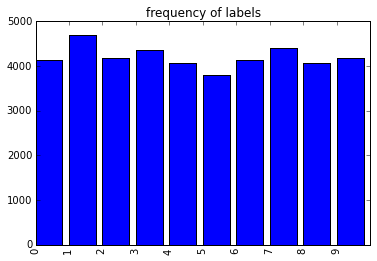

In [5]:
# x_tr_plt1=dict((x,x_tr_plt[x]) for x in x_tr_plt if x_tr_plt[x]>10)

plt.bar(range(len(y_tr_plt)), y_tr_plt.values())
plt.xticks(range(len(y_tr_plt)), y_tr_plt.keys(), rotation="vertical")
plt.title("frequency of labels")
plt.show()

Nothing of note from this

In [6]:
# create a histogram of pixel usage

x_tr_col=list(raw_train.columns.values[1:])
# print x_tr_col

# x_tr_df=raw_train[x_tr_col].head()

# create a new dictionary for all values that are higher than 0
x_tr_df={}
for x in raw_train[x_tr_col]:
    sublist=[]
    for xx in raw_train[x]:
        if xx>0:
#             print xx
            sublist.append(xx)        
    x_tr_df[x]=sublist
# print x_tr_df





In [7]:
x_tr_df1=dict((i, len(x_tr_df[i])) for i in x_tr_df if len(x_tr_df[i])>25000)
# number of values that fit condition above
len(x_tr_df1)

66

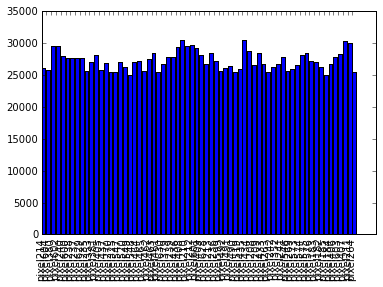

In [8]:
# create a dataframe that contains only values above 0
# x_tr_df1=pd.DataFrame.from_dict(x_tr_df)

plt.bar(range(len(x_tr_df1)), x_tr_df1.values())
plt.xticks(range(len(x_tr_df1)), x_tr_df1.keys(), rotation="vertical")
plt.show()

In [ ]:
# create a table of the different ranges of values for each pixel [values 0:255]
from collections import Counter
x_tr_dknes=dict(Counter(x for sublist in x_tr for x in sublist))
x_tr_dknes1=dict((x,x_tr_dknes[x]/20000) for x in x_tr_dknes if x_tr_dknes[x]>20000)

# plot the counter
plt.bar(range(len(x_tr_dknes1)), x_tr_dknes1.values())
plt.xticks(range(len(x_tr_dknes1)), x_tr_dknes1.keys(), rotation="vertical")
plt.show()


In [ ]:
# print x_tr_dknes
x_tr_dk=pd.DataFrame(x_tr_dknes.items(), columns=['pixelvalue', 'count'])
x_tr_dk.describe()

in order to clean some of the data i will change the pixel values that have counts below 25% to zero. The darkness of those pixels being so light may have to do with the fact that these pixels are associated with the end of the word.


In [ ]:
# use naive bayes classifier ( prior probability * probability given features)
from sklearn.naive_bayes import GaussianNB as NB

In [ ]:
clf=NB()
clf.fit(x_tr,y_tr)

In [11]:
y_test=pd.read_csv(loc+"test.csv")

In [ ]:
pred=clf.predict(y_test)
pred=pred.tolist()
pred=[int(i) for i in pred]
print pred

In [ ]:

# export predictions into a csv file

import csv


with open(loc+'submission.csv', 'wb') as f:  # Just use 'w' mode in 3.x
    w = csv.writer(f)
    w.writerow(["imageid", "label"])

    for i,v in enumerate(pred, start=1):
        w.writerow([i,v])


The Naive Bayes classifier produced an 0.51457 result. 

In [ ]:
len(pred)

In [ ]:
from sklearn.svm import SVC
clf2=SVC()
clf2.fit(x_tr, y_tr)
pred2=clf2.predict(y_test)


In [ ]:
print pred

In [9]:
# I will try to use the SGD Classifier instead as there are more than 100k datarows

from sklearn.linear_model import SGDClassifier as SGD

clf3=SGD()
clf3.fit(x_tr, y_tr)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [12]:
pred3=clf3.predict(y_test)

[2 0 9 ..., 3 9 2]


In [13]:
import csv


with open(loc+'submission2.csv', 'wb') as f:  # Just use 'w' mode in 3.x
    w = csv.writer(f)
    w.writerow(["imageid", "label"])
    for i,v in enumerate(pred3, start=1):
        w.writerow([i,v])


This produces a score of 0.84829!

In [14]:
from sklearn.ensemble import RandomForestClassifier as RF
clf4=RF()
clf4.fit(x_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
pred4=clf4.predict(y_test)
print pred4

[2 0 9 ..., 3 9 2]


In [19]:
with open(loc+'submission3.csv', 'wb') as f:
    w=csv.writer(f)
    w.writerow(['imageid','label'])
    for i,v in enumerate(pred4, start=1):
        w.writerow([i,v])

This produces a score of 0.941 which is only 6% off from 100%!